Carga de librerías

pip install yfinance
conda install yfinance

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as pdr

Función auxiliar para descargar los datos:

In [2]:

def getData(stocks, start, end):
    #parametros:
    #stocks: lista con las acciones que vas a usar
    #start: fecha de inicio
    #end: fecha de fin

    #baja los precios de cierre:
    stockData = pdr.download(stocks, start=start, end=end, progress=False)['Adj Close']
    #calcula los rendimientos
    returns = stockData.pct_change()
    returns = returns.dropna()
    #calcula el rendimiento medio
    meanReturns = returns.mean()
    #calcula la matriz de varianza covarianza de los rendimientos
    covMatrix = returns.cov()
    #regresa lo que estimamos
    return returns, meanReturns, covMatrix

In [57]:
np.random.seed(123) #semilla
T = 7 #horizonte temporal, días que se simularán
mc_sims = 400 #numero de simulaciones

CapitalInicial = 10000
stocks = ['BAC', 'GM', 'T', 'ADBE', 'WMT', 'SHW'] #portafolio
endDate = dt.datetime.now() #define hoy como fecha de fin
startDate = endDate - dt.timedelta(days = 365 * 3) #Toma datos de hace 3 años

In [58]:
endDate ##fecha de fin para descargar los datos (año, fecha, día, hh, min., seg, ms.)

datetime.datetime(2024, 2, 6, 21, 27, 19, 684337)

In [59]:
startDate

datetime.datetime(2021, 2, 6, 21, 27, 19, 684337)

In [60]:
returns, meanReturns, covMatrix = getData(stocks, startDate, endDate)

In [61]:
returns

Ticker,ADBE,BAC,GM,SHW,T,WMT
Date,,,,,,
2021-02-09,0.004638,-0.004231,-0.014416,-0.015193,-0.005214,0.005516
2021-02-10,-0.006814,0.000910,-0.021049,-0.000968,-0.002446,-0.011658
2021-02-11,0.008017,-0.003032,-0.025146,0.009785,0.004904,-0.000763
2021-02-12,0.004470,0.014903,0.001869,0.002447,0.003834,0.003125
2021-02-16,0.005613,0.026970,-0.002612,-0.018903,0.005903,0.008237
...,...,...,...,...,...,...
2024-01-31,-0.016211,-0.022420,0.017038,-0.010565,0.009127,-0.002053
2024-02-01,0.016397,-0.013525,0.001804,0.015441,0.019785,0.018517
2024-02-02,0.010909,-0.002384,0.001029,0.002944,-0.011641,0.007486


In [62]:
meanReturns ## Rendimiento medio por acción (todo el periodo)

Ticker
ADBE    0.000536
BAC     0.000250
GM     -0.000226
SHW     0.000507
T       0.000145
WMT     0.000353
dtype: float64

In [63]:
covMatrix  ## Matriz de varianza covarianza de los rendimientos

Ticker,ADBE,BAC,GM,SHW,T,WMT
Ticker,,,,,,
ADBE,0.000516,0.000100,0.000178,0.000154,0.000028,0.000063
BAC,0.000100,0.000311,0.000248,0.000103,0.000095,0.000041
GM,0.000178,0.000248,0.000578,0.000137,0.000103,0.000061
SHW,0.000154,0.000103,0.000137,0.000295,0.000053,0.000060
T,0.000028,0.000095,0.000103,0.000053,0.000249,0.000033
WMT,0.000063,0.000041,0.000061,0.000060,0.000033,0.000162


In [64]:
#Definiendo pesos aleatorios al portafolio

## weights = [1/4, 1/2, 1/4] Por si quisieras definir los pesos manualmente

weights = np.random.random(len(returns.columns))
weights

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646])

In [65]:
#ajustando a suma = 1
weights /=  np.sum(weights)
weights

array([0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
       0.14573043])

In [66]:
#estimando el rendimiento diario del portafolio según la ponderación
returns['portfolio'] = returns.dot(weights) # Multiplicación matricial AxB
# notación alternativa : returns @ weights
returns

Ticker,ADBE,BAC,GM,SHW,T,WMT,portfolio
Date,,,,,,,
2021-02-09,0.004638,-0.004231,-0.014416,-0.015193,-0.005214,0.005516,-0.003804
2021-02-10,-0.006814,0.000910,-0.021049,-0.000968,-0.002446,-0.011658,-0.005678
2021-02-11,0.008017,-0.003032,-0.025146,0.009785,0.004904,-0.000763,0.002622
2021-02-12,0.004470,0.014903,0.001869,0.002447,0.003834,0.003125,0.004557
2021-02-16,0.005613,0.026970,-0.002612,-0.018903,0.005903,0.008237,0.002874
...,...,...,...,...,...,...,...
2024-01-31,-0.016211,-0.022420,0.017038,-0.010565,0.009127,-0.002053,-0.004811
2024-02-01,0.016397,-0.013525,0.001804,0.015441,0.019785,0.018517,0.013275
2024-02-02,0.010909,-0.002384,0.001029,0.002944,-0.011641,0.007486,0.001228


In [67]:
#creando una matriz con los rendimientos medios
meanM = np.full( shape=(T,len(weights)), fill_value=meanReturns)

In [68]:
#transpuesta de meanM
meanM = meanM.T

In [69]:
#matriz llena de ceros que va a guardar los rendimientos del portafolio (ponderados)
#de cada día de cada simulación
portfolio_sims = np.full( shape = (T,mc_sims), fill_value = 0.0)

In [70]:
portfolio_sims

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
for m in range(mc_sims):
    Z = np.random.normal( size=(T, len(weights)) ) #matriz 30x6 z-scores estándar
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + L.dot(Z.T)   #L * Z
    portfolio_sims[:,m] = np.cumprod( np.inner(weights, dailyReturns.T) + 1) * CapitalInicial


In [72]:
def plotSims(portfolio_sims):
    plt.plot(portfolio_sims)
    plt.ylabel('Valor Portafolio ($)')
    plt.xlabel('Dias')
    plt.title('Simulacion por MC de un portafolio')
    plt.show()

def plotHist(portResults):
    plt.hist(portResults, bins=20, rwidth=0.85)
    plt.ylabel('Frecuencia')
    plt.xlabel('Valor final')
    plt.title('Resultados finales - Montecarlo, 100 días, 4000 sim, $10,000 inicial')
    plt.grid()
    plt.show()

In [73]:
#toma el último día de todos los escenarios
resultadosFinales = pd.Series(portfolio_sims[-1,:])

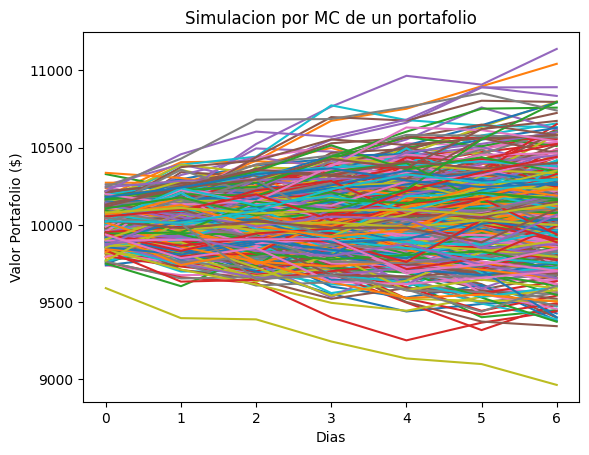

In [74]:
plotSims(portfolio_sims)

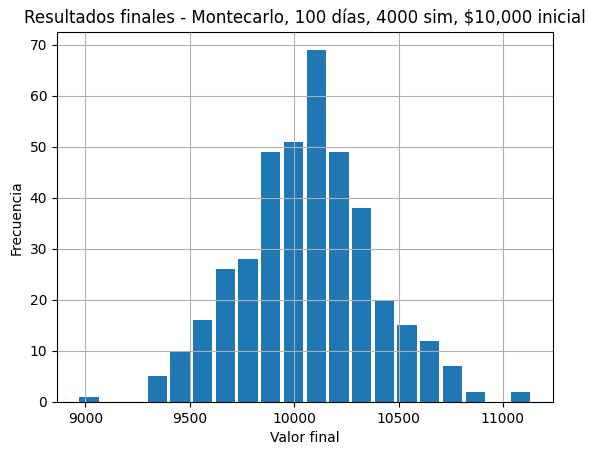

In [75]:
plotHist(resultadosFinales)

Método de Simulación Montecarlo

In [76]:
VAR = np.percentile(resultadosFinales-CapitalInicial,5)
VAR

-454.6117473512141